In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.stats import kstest

In [2]:
#read full dataframe

df =  pd.read_csv('letter-recognition.data', sep=",", header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
letters = df[0]
df = df.drop(0, axis=1)

KstestResult(statistic=0.9075998680518208, pvalue=0.0)


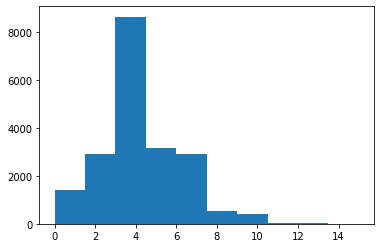

KstestResult(statistic=0.9028998680518208, pvalue=0.0)


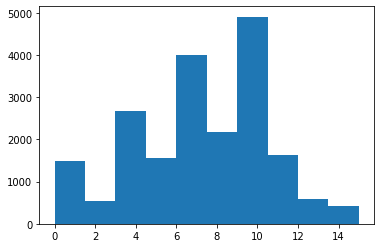

KstestResult(statistic=0.9482498680518208, pvalue=0.0)


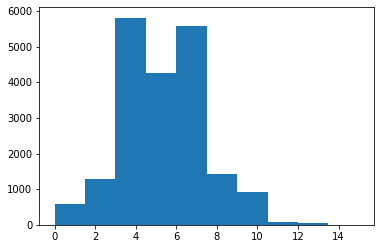

KstestResult(statistic=0.9148498680518208, pvalue=0.0)


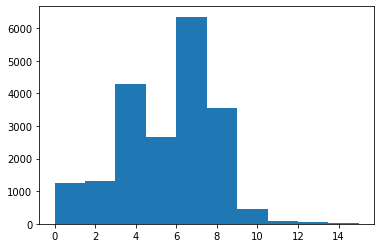

KstestResult(statistic=0.8138998680518208, pvalue=0.0)


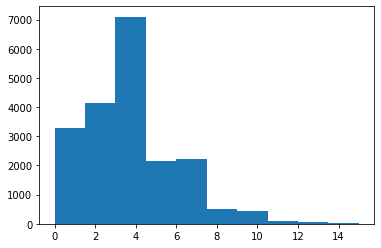

KstestResult(statistic=0.9739501019683698, pvalue=0.0)


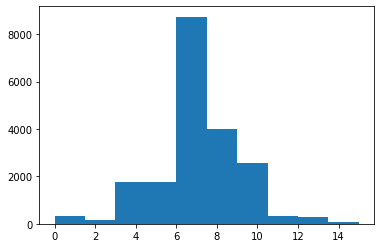

KstestResult(statistic=0.96995010196837, pvalue=0.0)


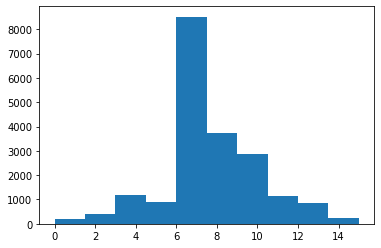

KstestResult(statistic=0.9019498680518208, pvalue=0.0)


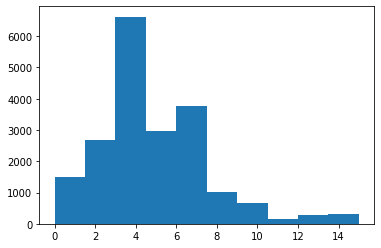

KstestResult(statistic=0.9226998680518208, pvalue=0.0)


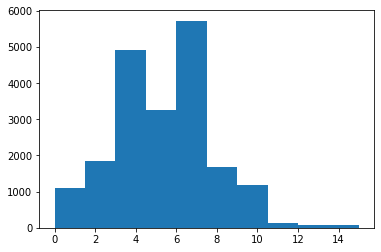

KstestResult(statistic=0.9834501019683699, pvalue=0.0)


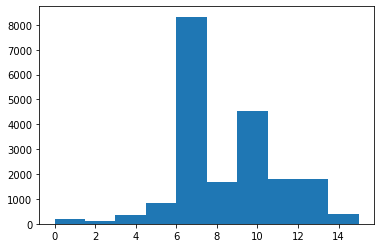

KstestResult(statistic=0.9463498680518208, pvalue=0.0)


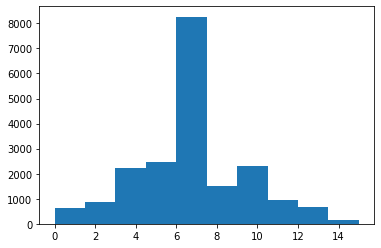

KstestResult(statistic=0.9948001019683699, pvalue=0.0)


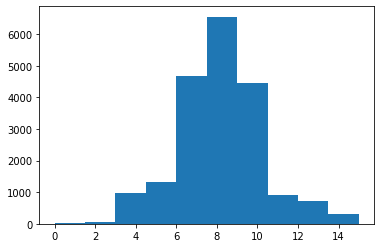

KstestResult(statistic=0.7257998680518207, pvalue=0.0)


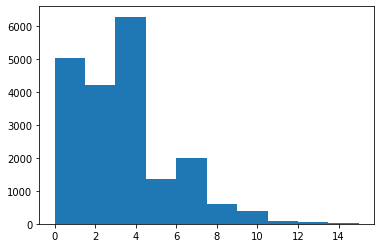

KstestResult(statistic=0.9971001019683698, pvalue=0.0)


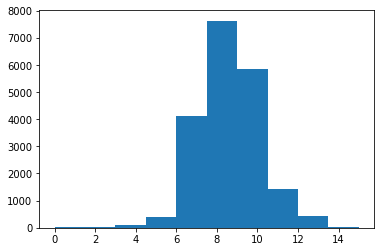

KstestResult(statistic=0.7516498680518208, pvalue=0.0)


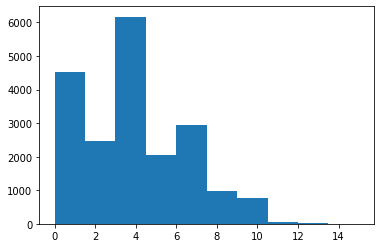

KstestResult(statistic=0.9962001019683699, pvalue=0.0)


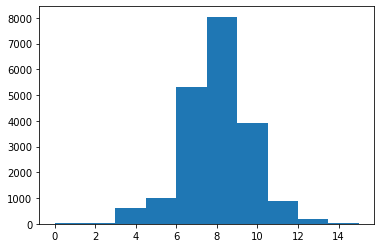

In [4]:
# test for gaussian distribution: kolmogorov-smirnov, histograms
for i in range(1,17):
    print(kstest(df[i], 'norm'))
    plt.hist(df[i])
    plt.show()


In [5]:
#DBSCAN

db = DBSCAN(eps=4, min_samples=20).fit(df)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#make copy of DF and then add new columns to it so we can rerun this code as much as we like
df1 = df.copy()
df1['cluster'] = labels
df1[0] = letters
print(n_clusters_, n_noise_)
df1

13 1915


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster,0
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,0,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,-1,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,0,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,-1,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,0,D
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,0,C
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,0,T
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,0,S


In [6]:
# show clusters and letter combinations
df2 = df1
pd.set_option('display.max_rows', 200)
df2.groupby(['cluster', 0]).size()

cluster  0
-1       A    101
         B     17
         C     39
         D     36
         E     18
         F     45
         G     55
         H     66
         I     41
         J     66
         K     85
         L     85
         M    171
         N    105
         O     38
         P     97
         Q     82
         R     24
         S    109
         T     35
         U     80
         V     70
         W    126
         X     52
         Y    168
         Z    104
 0       A    667
         B    749
         C    681
         D    769
         E    750
         F    697
         G    718
         H    477
         I    713
         J    483
         K    654
         L    493
         M    416
         N    467
         O    697
         P    706
         Q    701
         R    734
         S    619
         T    761
         U    527
         V    666
         W    626
         X    735
         Y    618
         Z    630
 1       L    145
 2       H    191
         M    205

In [7]:
# run dbscan for each letter separately
for ltr in range(65,91):
    ltr = chr(ltr)
    
    dfFiltered = df1[df1[0] == ltr]
    lettersFiltered = dfFiltered[0]
    dfFiltered = dfFiltered.drop(0, axis=1)
    dfFiltered = dfFiltered.drop('cluster', axis=1)

    
    dbFiltered = DBSCAN(eps=4.2, min_samples=10).fit(dfFiltered)

    core_samples_mask = np.zeros_like(dbFiltered.labels_, dtype=bool)
    core_samples_mask[dbFiltered.core_sample_indices_] = True
    labelsFiltered = dbFiltered.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_Filtered = len(set(labelsFiltered)) - (1 if -1 in labelsFiltered else 0)
    n_noise_Filtered = list(labelsFiltered).count(-1)

    #make copy of DF and then add new columns to it so we can rerun this code as much as we like
    df1Filtered = dfFiltered.copy()
    df1Filtered['cluster'] = labelsFiltered
    df1Filtered[0] = lettersFiltered
    print(ltr, n_clusters_Filtered, n_noise_Filtered)

A 5 43
B 2 8
C 4 15
D 2 18
E 4 8
F 4 28
G 2 50
H 5 67
I 5 12
J 7 17
K 4 56
L 5 23
M 2 128
N 5 33
O 3 16
P 3 21
Q 3 50
R 2 18
S 6 44
T 4 11
U 3 20
V 3 22
W 4 66
X 2 28
Y 6 64
Z 4 41


In [13]:
# run dbscan for each letter and feature separately
for ltr in range(65,91):
    ltr = chr(ltr)
    
    dfFiltered = df1[df1[0] == ltr]
    lettersFiltered = dfFiltered[0]
    dfFiltered = dfFiltered.drop(0, axis=1)
    dfFiltered = dfFiltered.drop('cluster', axis=1)

    #change feature and DBSCAN values here    
    dbFiltered = DBSCAN(eps=1, min_samples=20).fit(np.array(dfFiltered[12]).reshape(-1,1))

    core_samples_mask = np.zeros_like(dbFiltered.labels_, dtype=bool)
    core_samples_mask[dbFiltered.core_sample_indices_] = True
    labelsFiltered = dbFiltered.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_Filtered = len(set(labelsFiltered)) - (1 if -1 in labelsFiltered else 0)
    n_noise_Filtered = list(labelsFiltered).count(-1)

    #make copy of DF and then add new columns to it so we can rerun this code as much as we like
    df1Filtered = dfFiltered.copy()
    df1Filtered['cluster'] = labelsFiltered
    df1Filtered[0] = lettersFiltered
    print(ltr, n_clusters_Filtered, n_noise_Filtered)

A 1 0
B 1 0
C 1 0
D 1 3
E 1 0
F 1 0
G 1 0
H 1 0
I 1 5
J 1 0
K 1 0
L 1 0
M 1 0
N 1 0
O 1 0
P 1 0
Q 1 0
R 1 0
S 1 0
T 1 0
U 1 0
V 1 0
W 1 0
X 1 0
Y 1 0
Z 1 0
